Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Min Khant Soe"
ID = "122277"

---

# Linear Regression

In this lab, we'll take a look at how to build and evaluate linear regression models. Linear regression works well when there is an (approximately) linear relationship between the features and the variable we're trying to predict.

Before we start, let's import the Python packages we'll need for the tutorial:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Univariate example
Here's an example from <code>[Tim Niven's tutorial at Kaggle](https://www.kaggle.com/timniven/linear-regression-tutorial)</code>.

### Background
We would like to perform *univariate* linear regression using a single feature $x$, "Number of hours studied," to predict a single dependent variable, $y$, "Exam score."

We can say that we want to regress <code>num_hours_studied</code> onto <code>exam_score</code> in order to obtain a model to predict a student's exam score using the number of hours he or she studied.

In the standard setting, we assume that the dependent variable (the exam score) is a random variable that has a Gaussian distribution whose mean is a linear function of the independent variable(s) (the number of hours studied) and whose variance is unknown but constant:

\begin{equation}
y\sim\mathcal{N}(\theta_0+\theta_1x,\sigma^2)
\end{equation}

Our model or hypothesis, then, will be a function predicting $y$ based on $x$:
\begin{equation}
h_\theta(x)=\theta_0+\theta_1x
\end{equation}

Next we'll do something very typical in machine learning experiment: generate some synthetic data for which we know the "correct" model, then use those data to test our algorithm for finding the best model.

So let's generate some example data and examine the relationship between $x$ and $y$:

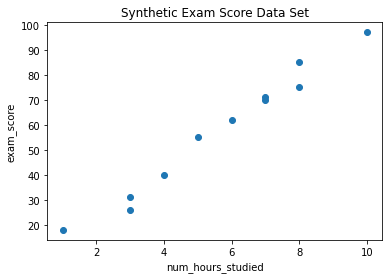

In [3]:
# Independent variable
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

### Design Matrix
The design matrix, usually written $\mathtt{X}$, contains our independent variables.

In general, with $m$ data points and $n$ features (independent variables), our design matrix will have $m$ rows and $n$ columns.

Note that we have a parameter $\theta_0$, which is the $y$-intercept term in our linear model. There is no independent variable to multiple $\theta_0$, so we will introduced a dummy variable always equal to 1 to represent the independent variable corresponding to $\theta_0$.

Putting the dummy variable and the number of hours studied together, we obtain the design matrix

\begin{equation}
\mathtt{X} = \begin{bmatrix}
    1 & 1\\
    1 & 3\\
    1 & 3\\
    1 & 4\\
    1 & 5\\
    1 & 6\\
    1 & 7\\
    1 & 7\\
    1 & 8\\
    1 & 8\\
    1 & 10\\
\end{bmatrix}
\end{equation} \
Notice that we do **not** include the dependent variable (exam score) in the design matrix.

In [4]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


### Hypothesis

Let's rewrite the hypothesis function now that we have a dummy variable for the intercept term in the model. We can write the independent variables including the dummy variable as a vector

$$\mathbf{x} = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix}, $$

where $x_0 = 1$ is our dummy variable and $x_1$ is the number of hours studied. We also write the parameters as a vector

$$\mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} .$$

Now we can conveniently write the hypothesis as

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

### Exercise 1 (2 points)

Write a Python code function to evaluate a hypothesis $\mathbf{\theta}$ for an entire design matrix:

**Hint**: Use numpy function of <code>dot</code>

In [5]:
# Evaluate hypothesis over a design matrix

def h(X,theta):
    # YOUR CODE HERE
    y_predicted = np.dot(X, theta)
#     raise NotImplementedError()
    return y_predicted

In [6]:
print(X.shape, np.array([0,10]).shape)

(11, 2) (2,)


In [7]:
print(h(X, np.array([0, 10])))

[ 10  30  30  40  50  60  70  70  80  80 100]


In [8]:
#practice
theta = np.array([0, 10])
y_predicted = theta.T @ X.T
print(theta.shape, X.shape, y_predicted.shape)

(2,) (11, 2) (11,)


**Expected output**: [ 10,  30,  30,  40,  50,  60,  70,  70,  80,  80, 100]

### Cost function
How can we find the best value of $\mathbf{\theta}$? We need a cost function and an algorithm to minimize that cost function.

In a regression problem, we normally use squared error to measure the goodness of fit:

$$\begin{align}
\ J(\mathbf{\theta}) & = \frac{1}{2} \sum_{i=1}^{m}\left(h_\mathbf{\theta}\left(\mathbf{x}^{(i)}\right) - y^{(i)}\right)^2 \\
\                    & = \frac{1}{2} \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)^\top \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)
\end{align}$$
Here we've used $\mathtt{X}$ to denote the design matrix and $\mathbf{y}$ to denote the vector$$\begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} $$

We'll see in a moment how to minimize this cost function.

### Exercise 2 (2 points)

Let's implement **cost function** in Python by these steps:

 1. Calculate $dy = \hat{y} - y = \mathtt{X}\theta - y$
 2. Calcuate $cost = \frac{1}{2}{dy}^T{dy}$

In [9]:
m = y.shape[0]

def cost(theta, X, y):
    # YOUR CODE HERE
    yhat = np.dot(X,theta)
    dy = yhat - y
    J = np.dot(dy.T,dy)/2
#     raise NotImplementedError()
    return J

In [10]:
print(cost(np.array([0, 10]), X, y))

85.0


In [11]:
#practice
m = y.shape[0]
theta = np.array([0, 10])
dy = np.dot(X,theta) - y
print(np.dot(X,theta).shape, y.shape, dy.shape)
J = np.dot(dy.T,dy)/2
print(J)

(11,) (11,) (11,)
85.0


**Expected output**: 85.0

### Aside: minimizing a convex function using the gradient

To solve our linear regression problem, we want to minimize the cost function $J(\mathbf{\theta})$ above with respect to the parameters $\mathbf{\theta}$.

$J$ is convex (see <code>[Wikipedia](https://en.wikipedia.org/wiki/Convex_function)</code> for an explanation) so it has just one minimum for some specific value of $\mathbf{\theta}$.

To find this minimum, we will find the point at which the gradient is equal to the zero vector.

The gradient of a multivariate function at a particular point is a vector pointing in the direction of maximum slope with a magnitude indicating the slope of the tangent at that point.

To make this clear, let's consider an example in which we consider the function $f(x) = 4x^2 - 6x + 11$ on the interval $[-10, 10]$ and plot its tangent lines at regular intervals.

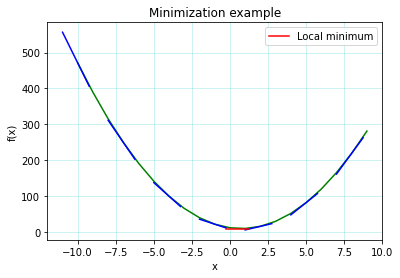

In [12]:
# Define range for plotting x
x = np.arange(-10, 10, 1)

# Example function f(x)
def f(x):
    return 4 * x * x - 6 * x + 11

# Plot f(x)
plt.plot(x, f(x), 'g')

# First derivative of f(x)
def dfx(x):
    return 8 * x - 6

# Plot tangent lines for f(x)
for i in np.arange(-10,10,3):
    x_i = np.arange(i - 1.0, i + 1.0, .25)
    m_i = dfx(i)
    c =  f(i) - m_i*i
    y_i = m_i*(x_i)  +  c
    plt.plot(x_i,y_i,'b')

# Plot tangent line at the minimum of f(x)
minimum = 0.75

for i in [minimum]:
    x_i = np.arange(i - 1, i + 1, .5)
    m_i = dfx(i)
    c = f(i) - m_i * i
    y_i = m_i * (x_i) + c
    plt.plot(x_i, y_i, 'r-', label='Local minimum')

# Decorate the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimization example')
plt.grid(axis='both',color='c', alpha=0.25)
plt.legend();
plt.show()

### Minimizing the cost function

Based on the previous example, we can see that to minimize our cost function, we just need to take the gradient with respect to $\mathbf{\theta}$ and determine where that gradient is equal to $\mathbf{0}$.

We have$$ J(\mathbf{\theta}) = \frac{1}{2} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 .$$This is a convex function of two variables ($\theta_0$ and $\theta_1$), so it has a single minimum where the gradient $\nabla_J(\mathbf{\theta})$ is $\mathbf{0}$.

Depending on the specific data, the cost function will look something like the surface plotted by the following code. Regardless of where we begin, the gradient always points "uphill," away from the global minimum.

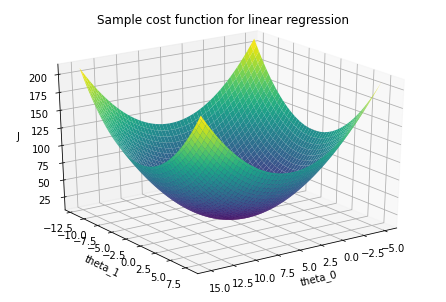

In [13]:
# Plot a sample 2D squared error cost function

from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-5.0, 15.0, 100)
x2 = np.linspace(-12.0, 8.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.square(X1 - np.mean(X1)) + np.square(X2 - np.mean(X2))) + 10

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J')
ax.set_title('Sample cost function for linear regression')
cm = plt.cm.get_cmap('viridis')
ax.plot_surface(X1, X2, Y, cmap=cm)
ax.view_init(elev=25, azim=55)
plt.show()

Take a look at the lecture notes. If you obtain the partial derivatives of the cost function $J$ with respect to $\mathbf{\theta}$, you get

$$ \nabla_J(\mathbf{\theta}) = \mathtt{X}^\top (\mathtt{X}\mathbf{\theta}-\mathbf{y}).$$

### Exercise 3 (2 points)

Write the gradient calculation in the equation above as a Python function:

In [14]:
# Gradient of cost function

def gradient(X, y, theta):
    #YOUR CODE HERE
    grad = np.dot(X.T, np.dot(X,theta)-y)
#     raise NotImplementedError()
    return grad

In [15]:
print(gradient(X, y, np.array([0, 10])))

[-10 -13]


**Expected output**: [-10, -13]

This means that if we currently had the parameter vector [0, 10] (where the cost is 85) and wanted to increase the cost, we could move in the direction [-10, -13]. On the other hand, if we wanted to decrease the cost (which of course we do), we should move in the opposite direction, i.e., [10, 13]. 

### Exercise 4 (2 points)

Implement this idea of gradient descent:

1. Calculate gradient from $X$, $y$ and $\theta$ using function <code>gradient</code>
2. Update $\theta_{new} = \theta + {\alpha}*grad$

In [16]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        # YOUR CODE HERE
        grad = (gradient(X, y, theta))
        theta = theta - alpha*grad
#         raise NotImplementedError()
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [17]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, np.array([0, 10]), 0.001, 10)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [ 0.08327017 10.02116759]
J_per_iter: [84.775269   84.65958757 84.5793525  84.51074587 84.44605981 84.38279953
 84.32015717 84.25787073 84.19585485 84.13408132]
gradient_per_iter [[-10.         -13.        ]
 [ -9.084       -6.894     ]
 [ -8.556648    -3.421524  ]
 [ -8.25039038  -1.4471287 ]
 [ -8.06991411  -0.32491618]
 [ -7.96100025   0.31253312]
 [ -7.8928063    0.67422616]
 [ -7.84778746   0.87905671]
 [ -7.81596331   0.9946576 ]
 [ -7.79165648   1.05950182]]


**Expected output**: \
theta: [ 0.08327017 10.02116759]\
J_per_iter: [84.775269   84.65958757 84.5793525  84.51074587 84.44605981 84.38279953\
 84.32015717 84.25787073 84.19585485 84.13408132]\
gradient_per_iter [[-10.         -13.        ]\
 [ -9.084       -6.894     ]\
 [ -8.556648    -3.421524  ]\
 [ -8.25039038  -1.4471287 ]\
 [ -8.06991411  -0.32491618]\
 [ -7.96100025   0.31253312]\
 [ -7.8928063    0.67422616]\
 [ -7.84778746   0.87905671]\
 [ -7.81596331   0.9946576 ]\
 [ -7.79165648   1.05950182]]

In [18]:
# Optimize parameters theta on dataset X, y

theta_initial = np.array([0, 0])
alpha = 0.0001
iterations = 3000
theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)
print('Optimal parameters: theta_0 %f theta_1 %f' % (theta[0], theta[1]))

Optimal parameters: theta_0 2.654577 theta_1 9.641848


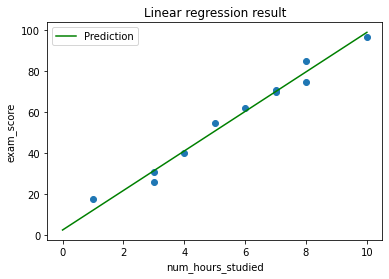

In [19]:
# Visualize the results

plt.scatter(num_hours_studied, exam_score)

x = np.linspace(0,10,20)
y_predicted = theta[0] + theta[1] * x
plt.plot(x, y_predicted, 'g', label='Prediction')

plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.legend();
plt.title('Linear regression result')
plt.show()

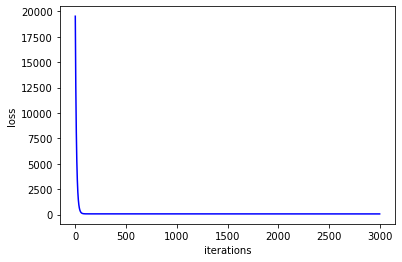

In [20]:
# Visualize the loss

x_loss = np.arange(0, iterations, 1)

plt.plot(x_loss, costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

## Excercise 5 (2 points)

Instead of repeating the code to plot the loss graph, we would like to encapsulate the code in a function.
Complete the loss plotting function below:

In [21]:
print(x_loss.shape, costs.shape)

(3000,) (3000,)


In [22]:
def cost_plot(iterations, costs):
    # YOUR CODE HERE   
    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.title("The loss graph")
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
#     raise NotImplementedError()

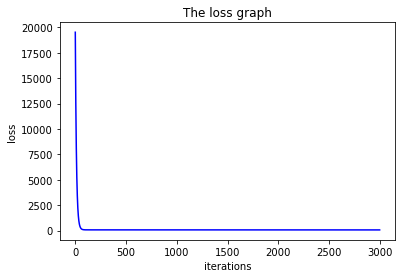

In [23]:
cost_plot(iterations, costs)

We can conclude from the loss curve that we have achieved convergence (the loss has stopped improving), and we can conclude that 3000 iterations is overkill! The loss is stable after 100 iterations or so.

### Goodness of fit
$R^2$ is a statistic that will give some information about the goodness of fit of a regression model. The $R^2$ coefficient of determination is 1 when the regression predictions perfectly fit the data. When $R^2$ is less than 1, it indicates the percentage of the variance in the target that is accounted for by the prediction.

$$\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}$$

### Exercise 6 (2 points)

Complete the `goodnees_of_fit` function implementing the equation for $R^2$ above:

In [24]:
y_predicted = h(X,theta)
a = np.square(y-y_predicted).sum()
b = np.square(y-y.mean()).sum()
print(a,b)

139.9741101852564 6548.181818181818


In [25]:
def goodness_of_fit(y, y_predicted):
    # YOUR CODE HERE
    r_square = 1 - np.square(y-y_predicted).sum()/np.square(y-y.mean()).sum()
#     raise NotImplementedError()
    return r_square,i

In [26]:
y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

(0.9786239731773175, 0.75)


**Expected output**: 0.9786239731773175

An $R^2$ of 0.98 indicates an extremely good (outrageously good, in fact) fit to the data.

## Multivariate linear regression example

Next, we extend our model to multiple variables. We'll use a data set from Andrew Ng's class. The data include two independent variables,
"Square Feet" and "Number of Bedrooms," and the dependent variable is "Price."

Let's load the data:

In [27]:
# We use numpy's genfromtxt function to load the data from the text file.

raw_data = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);

raw_data

array([['Square Feet', ' Number of bedrooms', 'Price'],
       ['2104', '3', '399900'],
       ['1600', '3', '329900'],
       ['2400', '3', '369000'],
       ['1416', '2', '232000'],
       ['3000', '4', '539900'],
       ['1985', '4', '299900'],
       ['1534', '3', '314900'],
       ['1427', '3', '198999'],
       ['1380', '3', '212000'],
       ['1494', '3', '242500'],
       ['1940', '4', '239999'],
       ['2000', '3', '347000'],
       ['1890', '3', '329999'],
       ['4478', '5', '699900'],
       ['1268', '3', '259900'],
       ['2300', '4', '449900'],
       ['1320', '2', '299900'],
       ['1236', '3', '199900'],
       ['2609', '4', '499998'],
       ['3031', '4', '599000'],
       ['1767', '3', '252900'],
       ['1888', '2', '255000'],
       ['1604', '3', '242900'],
       ['1962', '4', '259900'],
       ['3890', '3', '573900'],
       ['1100', '3', '249900'],
       ['1458', '3', '464500'],
       ['2526', '3', '469000'],
       ['2200', '3', '475000'],
       ['2637', 

Next, we split the raw data (currently strings) into headers and the data themselves:

In [28]:
# Extract headers and data
headers = raw_data[0,:];
print(headers)
data = np.array(raw_data[1:,:], dtype=float);
print(data)

['Square Feet' ' Number of bedrooms' 'Price']
[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00

In [29]:
data.shape

(47, 3)

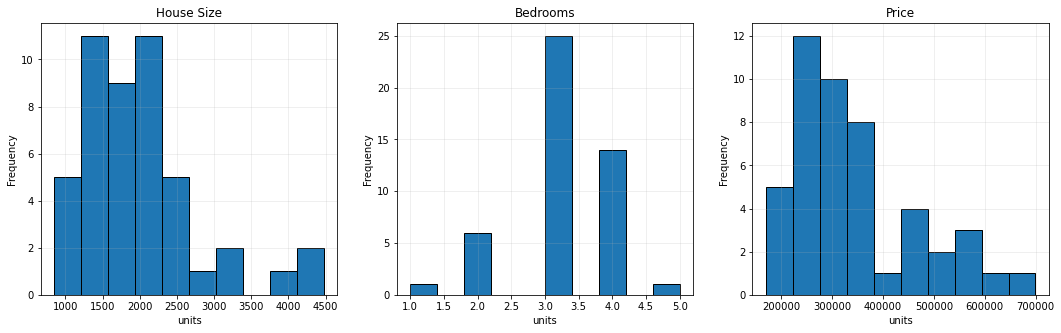

In [30]:
# Visualise the distribution of independent and dependent variables

# Make three subplots, in one row and three columns
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

# Variable 1: square footage
plt1.hist(data[:,0], label='Sq. feet', edgecolor='black')
plt1.set_title('House Size')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

# Variable 2: number of bedrooms
plt2.hist(data[:,1], label='Bedroom', edgecolor='black')
plt2.set_title('Bedrooms')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

# Variable 3: home price
plt3.hist(data[:,2], label='Price', edgecolor='black')
plt3.set_title('Price')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

### Normalization

We can see from the charts above that the independent variables and the dependent variables have very large differences in their ranges. If you try to use the gradient descent method on these data directly, you may have difficulty in finding a learning rate that is small enough that the costs will not grow out of control but is large enough that the number of iterations is not excessive.

Normalization of the independent and dependent variables can help with this.
One type of normalization, sometimes called "standardization" or "z-scaling,"
involves subtracting a variable's mean then dividing by its standard deviation,
calculated over the training samples. The result is a set of standardized variables,
each with a mean of 0 and a variance of 1 over the training set.


In [31]:
# Normalize the data

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_norm = (data - means) / stds
print(means.shape, stds.shape, data_norm.shape)

(3,) (3,) (47, 3)


In [32]:
# Extract y from the normalized dataset

y_label = 'Price'
y_index = np.where(headers == y_label)[0][0]
y = np.array(data_norm[:,y_index]).T

# Extract X from normalized dataset

X = data_norm[:,0:y_index]

# Insert column of 1's for intercept term

X = np.insert(X, 0, 1, axis=1)

In [33]:
# Get number of examples (m) and number of parameters (n)
m = X.shape[0]
n = X.shape[1]
print(m, n)

47 3


### Excercise 7 (5 points)

Optimize the parameters using gradient descent:

In [34]:
theta_initial = np.zeros((X.shape[1],1))
print(np.array([y]).shape, X.shape, theta_initial.shape, y.shape)

(1, 47) (47, 3) (3, 1) (47,)


In [35]:
theta_initial = np.zeros((X.shape[1],1))
alpha = 0.001
iterations = 3000
# YOUR CODE HERE
theta, cost, grad = gradient_descent(X,np.array([y]).T,theta_initial,alpha,iterations)
# raise NotImplementedError()

In [36]:
print('Theta values ', theta)

Theta values  [[-9.71445147e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]


**Expected output**:\
Theta values  [[-9.15933995e-17]\
 [ 8.84765988e-01]\
 [-5.31788197e-02]]

In [37]:
print(costs.shape, np.arange(0,iterations,1).shape)

(3000,) (3000,)


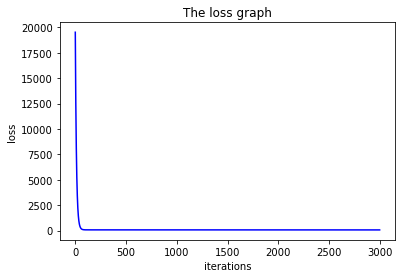

In [38]:
# Visualize the loss over the optimization
plt.title('Multivariate linear regression by gradient descent')
cost_plot(iterations, costs)

Transforming parameters back to the original scale
Now that we've got optimal parameters for our original data, we need to undo the normalization.

We have

$$\hat{y}^{\text{norm}} = \theta^\text{norm} \textbf{x}^\text{norm}$$

## Excercise 8 (3 points)

Modify the code to compute goodness of fit

In [39]:
# Goodness of fit
y_predicted = h(X,theta)
# YOUR CODE HERE
r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
# raise NotImplementedError()

In [40]:
print(r_square)

0.7329450180289143


### Transform standardized data back to original scale
We can transform standardized predicted values, y_predicted into the orginal data scale using$$y_{\text{norm}} = \sigma_y y + \mu_y$$

In [41]:
# Compute mean and standard deviation of data

sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))

# De-normalize y

y_predicted =  np.round(h(X, theta) * sigma[2] + mu[2])

# Print first five values of y_predicted

print(y_predicted[0:5,:])

[[356283.]
 [286121.]
 [397489.]
 [269244.]
 [472278.]]


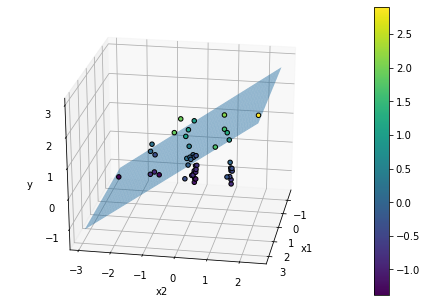

In [42]:
# 3D plot of standardized data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,1],X[:,2],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)

yy = (theta[0] + theta[1]*xx1.T + theta[2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()

## In-class exercises
Now that you're familiar with minimizing a cost function using its gradient and gradient descent, refer to the lecture notes to find the analytical solution (the normal equations) to the linear regression problem.

Implement the normal equation approach for the synthetic univariate data set and the housing price data set. Demonstrate your solution in the lab.

In [43]:
# just remove all parameters
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [44]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 2.1 (5 points)
Download raw_data and setup data

In [45]:
# Download raw_data and setup data
# YOUR CODE HERE
raw_data = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);
data = np.array(raw_data[1:,:], dtype = float);

# raise NotImplementedError()

In [46]:
print(data[:5])

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


**Expected result**:\
[[2.104e+03 3.000e+00 3.999e+05]\
 [1.600e+03 3.000e+00 3.299e+05]\
 [2.400e+03 3.000e+00 3.690e+05]\
 [1.416e+03 2.000e+00 2.320e+05]\
 [3.000e+03 4.000e+00 5.399e+05]]

### Exercise 2.2 (5 points)
Normalized data

In [47]:
# Normalized data

def normalized_data(data):
    # YOUR CODE HERE
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    data_norm = (data - means) / stds
#     raise NotImplementedError()
    return data_norm

In [48]:
data_norm = normalized_data(data)
print(data_norm[:5])

[[ 0.13141542 -0.22609337  0.48089023]
 [-0.5096407  -0.22609337 -0.08498338]
 [ 0.5079087  -0.22609337  0.23109745]
 [-0.74367706 -1.5543919  -0.87639804]
 [ 1.27107075  1.10220517  1.61263744]]


**Expected result**:\
[[ 0.13141542 -0.22609337  0.48089023]\
 [-0.5096407  -0.22609337 -0.08498338]\
 [ 0.5079087  -0.22609337  0.23109745]\
 [-0.74367706 -1.5543919  -0.87639804]\
 [ 1.27107075  1.10220517  1.61263744]]

### Exercise 2.3 (5 points)
Extract X and y from data

In [49]:
# Extract y from data
# YOUR CODE HERE
headers = raw_data[0,:];
y_label = 'Price'
y_index = np.where(headers == y_label)[0][0]
y = np.array(data_norm[:,y_index]).T

# raise NotImplementedError()

In [50]:
print(y.shape, y_index, headers)

(47,) 2 ['Square Feet' ' Number of bedrooms' 'Price']


In [51]:
print(y[:5])

[ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744]


**Expected result**: [ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744]

In [52]:
# Extract X from data
# YOUR CODE HERE
# Extract X from normalized dataset
X = data_norm[:,0:y_index]

# Insert column of 1's for intercept term
X = np.insert(X, 0, 1, axis=1)

# raise NotImplementedError()

In [53]:
print(X[:5,:])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


**Expected result**:\
[[ 1.          0.13141542 -0.22609337]\
 [ 1.         -0.5096407  -0.22609337]\
 [ 1.          0.5079087  -0.22609337]\
 [ 1.         -0.74367706 -1.5543919 ]\
 [ 1.          1.27107075  1.10220517]]

### Exercise 2.4 (8 points)
Create h, cost, gradient, and gradient_descent

In [54]:
# create h function
def h(X,theta):
    # YOUR CODE HERE
    y_predicted = np.dot(X, theta)
#     raise NotImplementedError()
    return y_predicted

In [55]:
print(h(X, np.array([1, 2, 4]))[:5])

[ 0.35845737 -0.92365487  1.11144393 -6.70492173  7.95096216]


**Expected result**: [ 0.35845737 -0.92365487  1.11144393 -6.70492173  7.95096216]

In [56]:
def cost(theta, X, y):
    # YOUR CODE HERE
    yhat = np.dot(X,theta)
    dy = yhat - y
    J = np.dot(dy.T,dy)/2
#     raise NotImplementedError()
    return J

In [57]:
print(cost(np.array([1, 8, 10]), X, y))

5477.13862837469


**Expected result**: 5477.138628374691

In [58]:
# Gradient of cost function
def gradient(X, y, theta):
    # YOUR CODE HERE
    grad = np.dot(X.T, np.dot(X,theta)-y)
#     raise NotImplementedError()
    return grad

In [59]:
print(gradient(X, y, np.array([1, 8, 10])))

[ 47.         599.00016917 659.76139633]


**Expected result**: [ 47.         599.00016917 659.76139633]

In [60]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        # YOUR CODE HERE
        grad = (gradient(X, y, theta))
        theta = theta - alpha*grad
#         raise NotImplementedError()
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [61]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, np.array([0, 1, 10]), 0.001, 10)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [-8.28226376e-16 -7.72838948e-01  6.35294636e+00]
J_per_iter: [2123.51284628 1873.56259758 1656.90935568 1468.93187452 1305.65834104
 1163.67477334 1040.04635308  932.24986509  838.11567544  755.77790087]
gradient_per_iter [[1.31450406e-13 2.70000169e+02 4.75532186e+02]
 [1.05693232e-13 2.44794887e+02 4.46076185e+02]
 [1.07025500e-13 2.21549490e+02 4.18667980e+02]
 [8.74855743e-14 2.00117968e+02 3.93159744e+02]
 [1.03916875e-13 1.80365065e+02 3.69414440e+02]
 [7.04991621e-14 1.62165488e+02 3.47305031e+02]
 [6.29496455e-14 1.45403177e+02 3.26713748e+02]
 [5.29576383e-14 1.29970626e+02 3.07531415e+02]
 [5.98410210e-14 1.15768253e+02 2.89656812e+02]
 [4.64073224e-14 1.02703825e+02 2.72996100e+02]]


**Expected result**:
theta: [-8.20787882e-16 -7.72838948e-01  6.35294636e+00]\
J_per_iter: [2123.51284628 1873.56259758 1656.90935568 1468.93187452 1305.65834104\
 1163.67477334 1040.04635308  932.24986509  838.11567544  755.77790087]\
gradient_per_iter [[1.31450406e-13 2.70000169e+02 4.75532186e+02]\
 [9.68114477e-14 2.44794887e+02 4.46076185e+02]\
 [9.63673585e-14 2.21549490e+02 4.18667980e+02]\
 [8.92619312e-14 2.00117968e+02 3.93159744e+02]\
 [1.11022302e-13 1.80365065e+02 3.69414440e+02]\
 [7.40518757e-14 1.62165488e+02 3.47305031e+02]\
 [5.05151476e-14 1.45403177e+02 3.26713748e+02]\
 [6.09512441e-14 1.29970626e+02 3.07531415e+02]\
 [6.29496455e-14 1.15768253e+02 2.89656812e+02]\
 [4.74065232e-14 1.02703825e+02 2.72996100e+02]]\

### Exercise 2.5 (5 points)

Do optimization using gradient descent with $\alpha = 0.003$ and 30,000 iterations

In [62]:
# YOUR CODE HERE
theta_initial = np.zeros((X.shape[1],1))
alpha = 0.003
iterations = 30000
# YOUR CODE HERE
theta, costs, grad = gradient_descent(X,np.array([y]).T,theta_initial,alpha,iterations)
# raise NotImplementedError()

In [63]:
print("theta:", theta)
print("cost_per_iter:", costs[-5:])
print("gradient_per_iter", grad[-5:])

theta: [[-7.69384556e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
cost_per_iter: [6.27579208 6.27579208 6.27579208 6.27579208 6.27579208]
gradient_per_iter [[-1.38777878e-16 -1.78468351e-14  1.15185639e-15]
 [ 3.05311332e-16 -1.78468351e-14  1.15185639e-15]
 [-1.38777878e-16 -1.78468351e-14  1.15185639e-15]
 [-1.38777878e-16 -1.78468351e-14  1.15185639e-15]
 [ 3.05311332e-16 -1.78468351e-14  1.15185639e-15]]


**Expected result**:\
theta: [-1.05832010e-16  8.84765988e-01 -5.31788197e-02]\
J_per_iter: [6.27579208 6.27579208 6.27579208 6.27579208 6.27579208]\
gradient_per_iter [[ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]]

### Exercise 2.6 (2 points)

Calculate goodness of fit

In [64]:
def goodness_of_fit(y, y_predicted):
    # YOUR CODE HERE
    r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
#     raise NotImplementedError()
    return r_square

In [65]:
y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

0.7329450180289143


**Expected result**: 0.7329450180289143

## Excercise 2.7 (2 point)

Plot graph of cost results

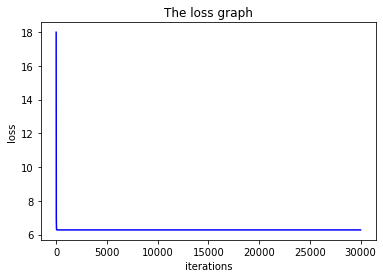

In [66]:
def cost_plot(iterations, costs):
    # YOUR CODE HERE
    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.title("The loss graph")
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
#     raise NotImplementedError()
    
cost_plot(iterations, costs)

### Exercise 2.8 (8 points)

Write a function implementing the normal equations for linear equation:

In [67]:
# Function to use the normal equations to find the optimal
# parameters for a linear regression model

def normal_equation(X, y):
    # YOUR CODE HERE
    theta = (np.linalg.inv(X.T @ X)) @ (X.T @ y)
#     raise NotImplementedError()
    return theta

In [68]:
print(X.shape, np.array([y]).T.shape)

(47, 3) (47, 1)


In [69]:
theta_norm = normal_equation(X,np.array([y]).T)
print("theta from normal equation:", theta_norm.T)
y_norm_predicted =  h(X, theta_norm)
r_norm_square = goodness_of_fit(y, y_norm_predicted)
print("r_square:", r_norm_square)

theta from normal equation: [[-7.76616596e-17  8.84765988e-01 -5.31788197e-02]]
r_square: 0.7329450180289143


**Expected result**:\
theta from normal equation: [[-7.90434550e-17  8.84765988e-01 -5.31788197e-02]]\
r_square: 0.7329450180289143

### Take-home exercise (40 points)
Find an interesting dataset for linear regression on Kaggle. Implement the normal equations and gradient descent then evaluate your model's performance.

Write a brief report on your experiments and results in the form of a Jupyter notebook.

Explain the dataset which you get and which rows which you use.
How many data in your dataset?

YOUR ANSWER HERE

Write down your all code at below.
Show the results, goodness of fit and plot cost graph

In [70]:
# YOUR CODE HERE
# raise NotImplementedError()

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
raw_data = pd.read_csv('Worldometer__Covid_19_Data_set_from_Kaggle.csv')
raw_data.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [73]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [74]:
raw_data.isnull().any()

Country/Region      False
Continent            True
Population           True
TotalCases          False
NewCases             True
TotalDeaths          True
NewDeaths            True
TotalRecovered       True
NewRecovered         True
ActiveCases          True
Serious,Critical     True
Tot Cases/1M pop     True
Deaths/1M pop        True
TotalTests           True
Tests/1M pop         True
WHO Region           True
dtype: bool

In [75]:
raw_data['Continent'].fillna('Unknown', inplace = True)
raw_data['WHO Region'].fillna('Unknown', inplace = True)
raw_data.fillna(0, inplace = True)

In [76]:
raw_data.isnull().any()

Country/Region      False
Continent           False
Population          False
TotalCases          False
NewCases            False
TotalDeaths         False
NewDeaths           False
TotalRecovered      False
NewRecovered        False
ActiveCases         False
Serious,Critical    False
Tot Cases/1M pop    False
Deaths/1M pop       False
TotalTests          False
Tests/1M pop        False
WHO Region          False
dtype: bool

In [77]:
print(raw_data['Continent'].unique())
print(raw_data['WHO Region'].unique())

['North America' 'South America' 'Asia' 'Europe' 'Africa'
 'Australia/Oceania' 'Unknown']
['Americas' 'South-EastAsia' 'Europe' 'Africa' 'EasternMediterranean'
 'WesternPacific' 'Unknown']


In [78]:
raw_data.loc[raw_data['Continent']=='North America','Continent_No'] = 1
raw_data.loc[raw_data['Continent']=='South America','Continent_No'] = 2
raw_data.loc[raw_data['Continent']=='Asia','Continent_No'] = 3
raw_data.loc[raw_data['Continent']=='Europe','Continent_No'] = 4
raw_data.loc[raw_data['Continent']=='Africa','Continent_No'] = 5
raw_data.loc[raw_data['Continent']=='Australia/Oceania','Continent_No'] = 6
raw_data.loc[raw_data['Continent']=='Unknown','Continent_No'] = 7

raw_data.loc[raw_data['WHO Region']=='Americas','WHO_Region'] = 1
raw_data.loc[raw_data['WHO Region']=='South-EastAsia','WHO_Region'] = 2
raw_data.loc[raw_data['WHO Region']=='Europe','WHO_Region'] = 3
raw_data.loc[raw_data['WHO Region']=='Africa','WHO_Region'] = 4
raw_data.loc[raw_data['WHO Region']=='EasternMediterranean','WHO_Region'] = 5
raw_data.loc[raw_data['WHO Region']=='WesternPacific','WHO_Region'] = 6
raw_data.loc[raw_data['WHO Region']=='Unknown','WHO_Region'] = 7

In [79]:
data = raw_data.drop('WHO Region', axis=1)
data = data.drop('Continent', axis=1)
data = data.drop("ActiveCases", axis = 1)
data = data.drop("Serious,Critical", axis = 1)
data = data.drop("Tot Cases/1M pop", axis = 1)
data = data.drop("Deaths/1M pop", axis = 1)
data = data.drop("Tests/1M pop", axis = 1)
data = data.drop("NewCases", axis = 1)
data = data.drop("NewDeaths", axis = 1)
data = data.drop("NewRecovered", axis = 1)
data = data.drop("TotalRecovered", axis = 1)
data = data.drop("Country/Region", axis = 1)

data = data[['WHO_Region', 'Continent_No', 'Population', 'TotalTests', 'TotalCases', 'TotalDeaths']]
data.head()

,WHO_Region,Continent_No,Population,TotalTests,TotalCases,TotalDeaths
0,1.0,1.0,3.311981e+08,63139605.0,5032179,162804.0
1,1.0,2.0,2.127107e+08,13206188.0,2917562,98644.0
2,2.0,3.0,1.381345e+09,22149351.0,2025409,41638.0
3,3.0,4.0,1.459409e+08,29716907.0,871894,14606.0
4,4.0,5.0,5.938157e+07,3149807.0,538184,9604.0


In [80]:
data.shape

(209, 6)

In [81]:
data_array=np.array(data)

In [82]:
column_name=data.columns.to_list()
column_name

['WHO_Region',
 'Continent_No',
 'Population',
 'TotalTests',
 'TotalCases',
 'TotalDeaths']

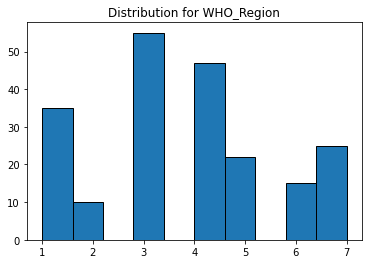

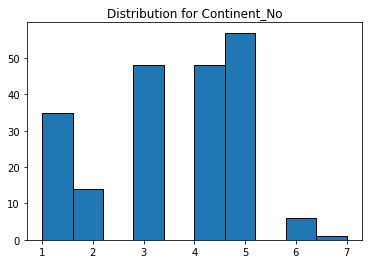

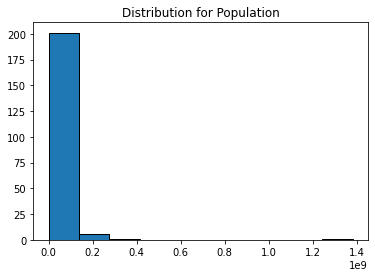

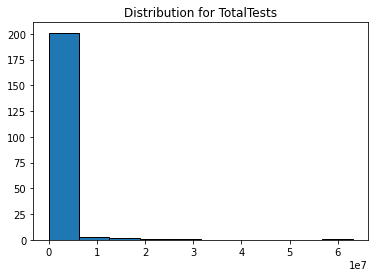

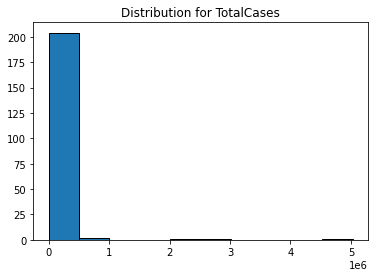

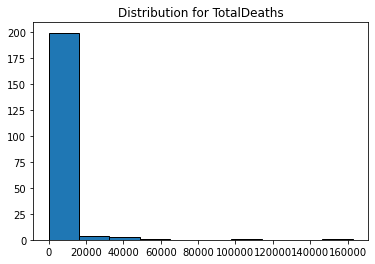

In [83]:
# Checking distribution of data
for i in range(0,len(data.columns)):
    plt.hist(data_array[:,i], edgecolor='black')
    title='Distribution for '+ column_name[i]
    plt.title(title)
    plt.show()

In [84]:
# Let's normalize our data
normalised_data = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)
normalised_data

,WHO_Region,Continent_No,Population,TotalTests,TotalCases,TotalDeaths
0,-1.496884,-1.685054,2.885639,11.650380,11.448162,10.847664
1,-1.496884,-1.005177,1.749448,2.245882,6.548117,6.481171
2,-0.951852,-0.325300,12.955635,3.930244,4.480797,2.601553
3,-0.406819,0.354577,1.109184,5.355523,1.807843,0.761855
4,0.138214,1.034454,0.279155,0.351855,1.034561,0.421438
...,...,...,...,...,...,...
204,1.773312,-1.685054,-0.290215,-0.241370,-0.212502,-0.232107
205,1.773312,-1.685054,-0.290011,-0.241302,-0.212502,-0.232175
206,1.773312,-1.005177,-0.290229,-0.241040,-0.212502,-0.232175
207,-0.406819,0.354577,-0.290255,-0.241382,-0.212505,-0.232175


In [85]:
y = normalised_data['TotalDeaths']
X = normalised_data.drop(['TotalDeaths'], axis=1);

In [86]:
y.head()

0    10.847664
1     6.481171
2     2.601553
3     0.761855
4     0.421438
Name: TotalDeaths, dtype: float64

In [87]:
X.head()

,WHO_Region,Continent_No,Population,TotalTests,TotalCases
0,-1.496884,-1.685054,2.885639,11.650380,11.448162
1,-1.496884,-1.005177,1.749448,2.245882,6.548117
2,-0.951852,-0.325300,12.955635,3.930244,4.480797
3,-0.406819,0.354577,1.109184,5.355523,1.807843
4,0.138214,1.034454,0.279155,0.351855,1.034561


In [88]:
X_input=np.array(X)
y_input=np.array(y)

In [89]:
def h(X,theta):
    y_predicted = np.dot(X, theta)
    return y_predicted

def cost(theta, X, y):
    yhat = np.dot(X,theta)
    dy = yhat - y
    J = np.dot(dy.T,dy)/2
    return J

def gradient(X, y, theta):
    grad = np.dot(X.T, np.dot(X,theta)-y)
    return grad

def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = (gradient(X, y, theta))
        theta = theta - alpha*grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

def goodness_of_fit(y, y_predicted):
    r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
    return r_square

def cost_plot(iterations, costs):
    x_loss = np.arange(0, iterations, 1)
    plt.plot(x_loss, costs, 'b-')
    plt.title("The loss graph")
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()


def normal_equation(X, y):
    theta = (np.linalg.inv(X.T @ X)) @ (X.T @ y)
    return theta

In [90]:
X_input = np.insert(X_input, 0, 1, axis=1)
m = X_input.shape[0]
n = X_input.shape[1]
theta_initial = np.zeros((X_input.shape[1],1))
alpha = [0.0005, 0.0005, 0.0005,0.0005,0.0005]
iterations = [10,50,100,10000,40000]

Alpha = 0.0005
Iterations = 10
Theta =  [[-7.07767178e-19]
 [-6.45897555e-02]
 [-4.22503734e-02]
 [ 8.99315583e-02]
 [ 3.50782566e-01]
 [ 4.29284719e-01]]


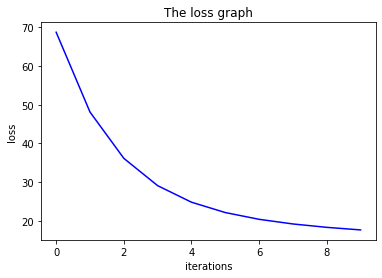

Alpha = 0.0005
Iterations = 50
Theta =  [[ 2.83106871e-18]
 [-4.46014834e-02]
 [-1.41728796e-02]
 [-7.55550938e-02]
 [ 3.18719537e-01]
 [ 6.54764293e-01]]


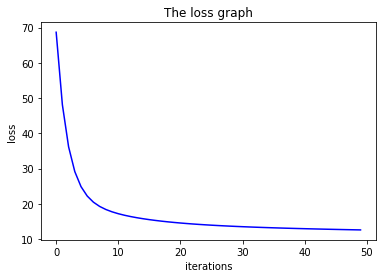

Alpha = 0.0005
Iterations = 100
Theta =  [[ 6.38378239e-19]
 [-4.21387584e-02]
 [-5.86060535e-03]
 [-9.93977871e-02]
 [ 2.22494303e-01]
 [ 7.69832988e-01]]


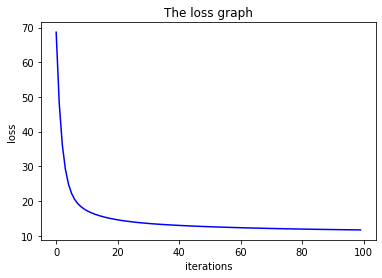

Alpha = 0.0005
Iterations = 10000
Theta =  [[ 1.80411242e-19]
 [-3.87946325e-02]
 [ 2.84221389e-03]
 [-1.12530856e-01]
 [ 8.16637003e-02]
 [ 9.20389313e-01]]


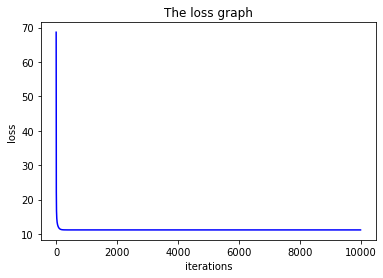

Alpha = 0.0005
Iterations = 40000
Theta =  [[ 1.80411242e-19]
 [-3.87946325e-02]
 [ 2.84221389e-03]
 [-1.12530856e-01]
 [ 8.16637003e-02]
 [ 9.20389313e-01]]


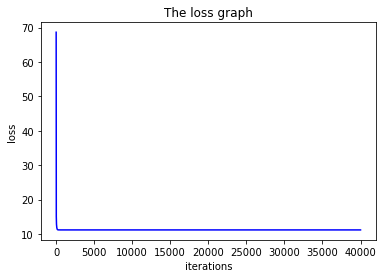

In [91]:
for i in range(0, len(alpha)):
    theta, costs, grad = gradient_descent(X_input,np.array([y]).T,theta_initial,alpha[i],iterations[i])
    print('Alpha =', alpha[i])
    print('Iterations =', iterations[i])
    print('Theta = ', theta)
    cost_plot(iterations[i], costs)

In [92]:
y_predicted =  h(X_input,theta)
print(y_predicted)
r_square = goodness_of_fit(y_input, y_predicted)
print(r_square)

[[ 1.12167374e+01]
 [ 6.06857130e+00]
 [ 3.02312971e+00]
 [ 1.99324371e+00]
 [ 9.47097606e-01]
 [ 7.34406701e-01]
 [ 8.46549755e-01]
 [ 6.61004325e-01]
 [ 6.08208176e-01]
 [ 6.48452499e-01]
 [ 4.22075715e-01]
 [ 6.87403690e-01]
 [ 4.14387266e-01]
 [ 1.83923418e-01]
 [ 2.26740460e-01]
 [ 4.09583829e-01]
 [ 3.25280282e-01]
 [ 3.22642392e-01]
 [ 3.34747358e-01]
 [ 2.42316840e-01]
 [ 6.30927524e-02]
 [-6.91714746e-02]
 [-1.63728960e-01]
 [ 1.49150955e-01]
 [ 3.38017143e-02]
 [ 4.98109170e-02]
 [-1.12149835e-01]
 [ 5.05568583e-02]
 [ 4.70824465e-02]
 [ 1.13176461e-02]
 [-3.87188119e-02]
 [ 2.07505863e-02]
 [-3.20460398e-02]
 [ 2.64715952e-02]
 [ 2.19809339e-02]
 [ 5.58927499e-04]
 [-5.72867512e-02]
 [-9.29129624e-03]
 [-7.93442814e-03]
 [-4.28469683e-02]
 [-4.62278067e-02]
 [-9.85254833e-02]
 [-3.01975689e-02]
 [-3.96064083e-02]
 [-6.45784805e-02]
 [-3.06812018e-01]
 [-4.22198175e-02]
 [-1.06978073e-01]
 [-2.63095231e-01]
 [-8.34383337e-02]
 [-1.27890200e-01]
 [-8.82869820e-02]
 [-1.7210589

In [93]:
print(X_input.shape, np.array([y_input]).T.shape)

(209, 6) (209, 1)


In [94]:
Theta_Opt = normal_equation(X_input, np.array([y_input]).T)

print(Theta_Opt)

[[-6.35175970e-17]
 [-3.87946325e-02]
 [ 2.84221389e-03]
 [-1.12530856e-01]
 [ 8.16637003e-02]
 [ 9.20389313e-01]]


In [95]:
y_predicted = h(X_input, Theta_Opt)
r_square = goodness_of_fit(y_input, y_predicted)
print(r_square)

0.892868899332311


In [96]:
#Explain the dataset which you get and which rows which you use. How many data in your dataset?

<html>
    <h3>
        A brief report on my experiments and results in the form of a Jupyter notebook.
    </h3>
    <p> 
The dataset I got is <b> a Covid-19 dataset </b> which includes number of confirmed, death and, recovered cases every day across the world. This dataset is collected from https://www.worldometers.info/ by Devakumar kp, a Datasets master on Kaggle. 
    
In this datasets, 209 rows and 16 columns of data are included. The list of columns of the data is as follow.

<ol>
<li>Country/Region </li>     
<li>Continent</li>            
<li>Population</li>           
<li>TotalCases</li>          
<li>NewCases</li>             
<li>TotalDeaths</li>          
<li>NewDeaths</li>            
<li>TotalRecovered</li>       
<li>NewRecovered</li>         
<li>ActiveCases</li>          
<li>Serious,Critical</li>     
<li>Tot Cases/1M pop</li>     
<li>Deaths/1M pop</li>        
<li>TotalTests</li>           
<li>Tests/1M pop</li>         
<li>WHO Region</li>
    </ol>

However, in this homework, I only used the data of "Continent", "WHO Region", "Population", "TotalTests", "TotalCases" and "TotalDeath" columns by dropping the other columns. 
    
I used "Contient" and "WHO Region" as categorical columns which contain unique values, then replaced the data (categorical labels) inside these columns with numerical labels. Then these categorical columns were removed.

Then I get new data sets consiting of 6 columns such as "WHO_Region", "Continent_No", "Population", "TotalTests", "TotalCases" and "TotalDeath". Thus, my new dataset has 209 rows and 6 columns. 
    
I used "TotalDeath" as a dependent variable and the other columns as independent variables.
   
Since my r_square value is high, I can say that the model is a good linear regression model.
</p>
</html>